In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import os
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve, auc, f1_score
import warnings
warnings.filterwarnings("ignore")

CONFIG = {
    'seed': 42  
}

def set_seed(seed=42):
    torch.manual_seed(seed)  
    torch.cuda.manual_seed(seed)  
    
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seed(CONFIG['seed']) 

df = pd.read_csv("creditcard_2023.csv")

x = df.drop(['Class', 'id'], axis=1).values
y = df["Class"].values

df.isnull().sum()
LABELS=["Normal","Fraud"]

In [3]:
df.head(20)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
5,5,0.025302,-0.140514,1.191138,-0.707979,0.430490,0.458973,0.611050,-0.092629,0.180811,...,-0.187739,-0.538518,-0.050465,-0.631553,-0.456480,0.252670,0.066681,0.095812,6901.49,0
6,6,1.016482,-0.397181,0.497868,-0.144463,0.331022,0.629243,0.431262,-0.134007,0.796159,...,-0.171137,-0.287017,-0.178197,-1.297597,1.182503,-0.604228,-0.198163,-0.087619,18954.45,0
7,7,-0.051306,-0.007194,1.139941,-0.877880,0.684668,0.714326,0.892615,-0.908409,0.901938,...,0.620676,-0.920426,0.034660,-1.091527,-0.742075,-0.104863,-1.382522,-2.748268,12298.23,0
8,8,-0.130680,-0.349547,0.425786,-0.760444,1.702777,2.324816,0.568968,0.049100,0.273118,...,-0.132787,-0.284700,-0.227779,2.248754,0.534846,-0.929738,-0.224385,0.243790,22052.90,0
9,9,0.058419,-0.093507,1.117270,-0.735172,0.466111,0.332371,0.683425,-0.136674,0.096409,...,-0.203634,-0.601581,-0.145082,-0.654783,-0.196621,0.226818,0.057119,0.100629,210.35,0


In [4]:
duplicate_rows = df[df.duplicated()]
print("Duplicate rows:")
print(duplicate_rows)

Duplicate rows:
Empty DataFrame
Columns: [id, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 31 columns]


In [5]:
df.info()
print("\n")
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


Text(0, 0.5, 'Frequency')

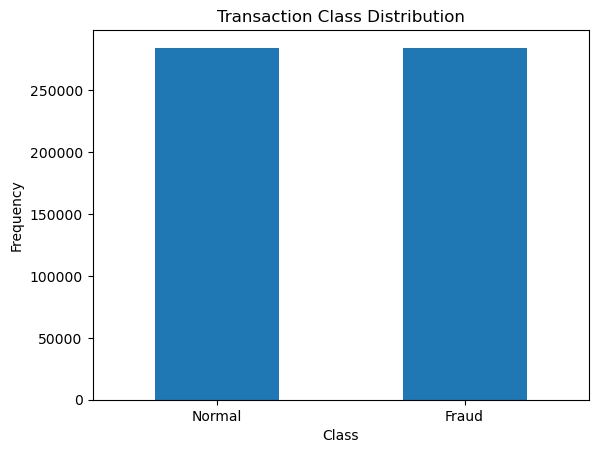

In [6]:
count=pd.value_counts(df['Class'],sort=True)
count.plot(kind='bar',rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2),LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")


In [7]:
fraud=df[df['Class']==1]
normal=df[df['Class']==0]
print(fraud.shape,normal.shape)

(284315, 31) (284315, 31)


In [8]:
fraud.Amount.describe()

count    284315.000000
mean      12057.601763
std        6909.750891
min          50.010000
25%        6074.640000
50%       12062.450000
75%       18033.780000
max       24039.930000
Name: Amount, dtype: float64

In [9]:
normal.Amount.describe()

count    284315.000000
mean      12026.313506
std        6929.500715
min          50.120000
25%        6034.540000
50%       11996.900000
75%       18040.265000
max       24039.930000
Name: Amount, dtype: float64

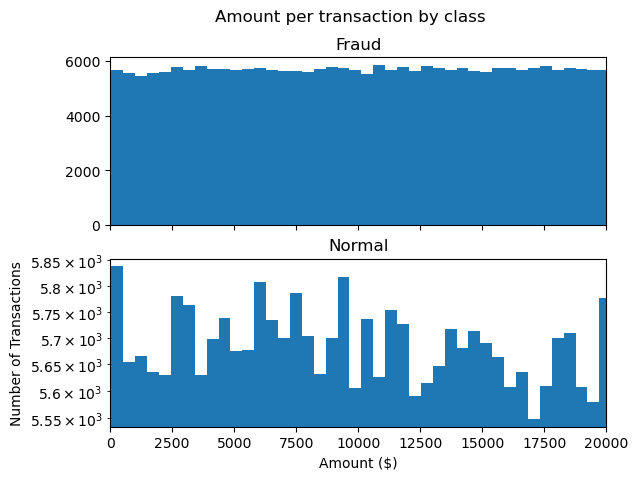

In [10]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle("Amount per transaction by class")
bins = 50
ax1.hist(fraud.Amount, bins=bins)
ax1.set_title("Fraud")
ax2.hist(normal.Amount, bins=bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

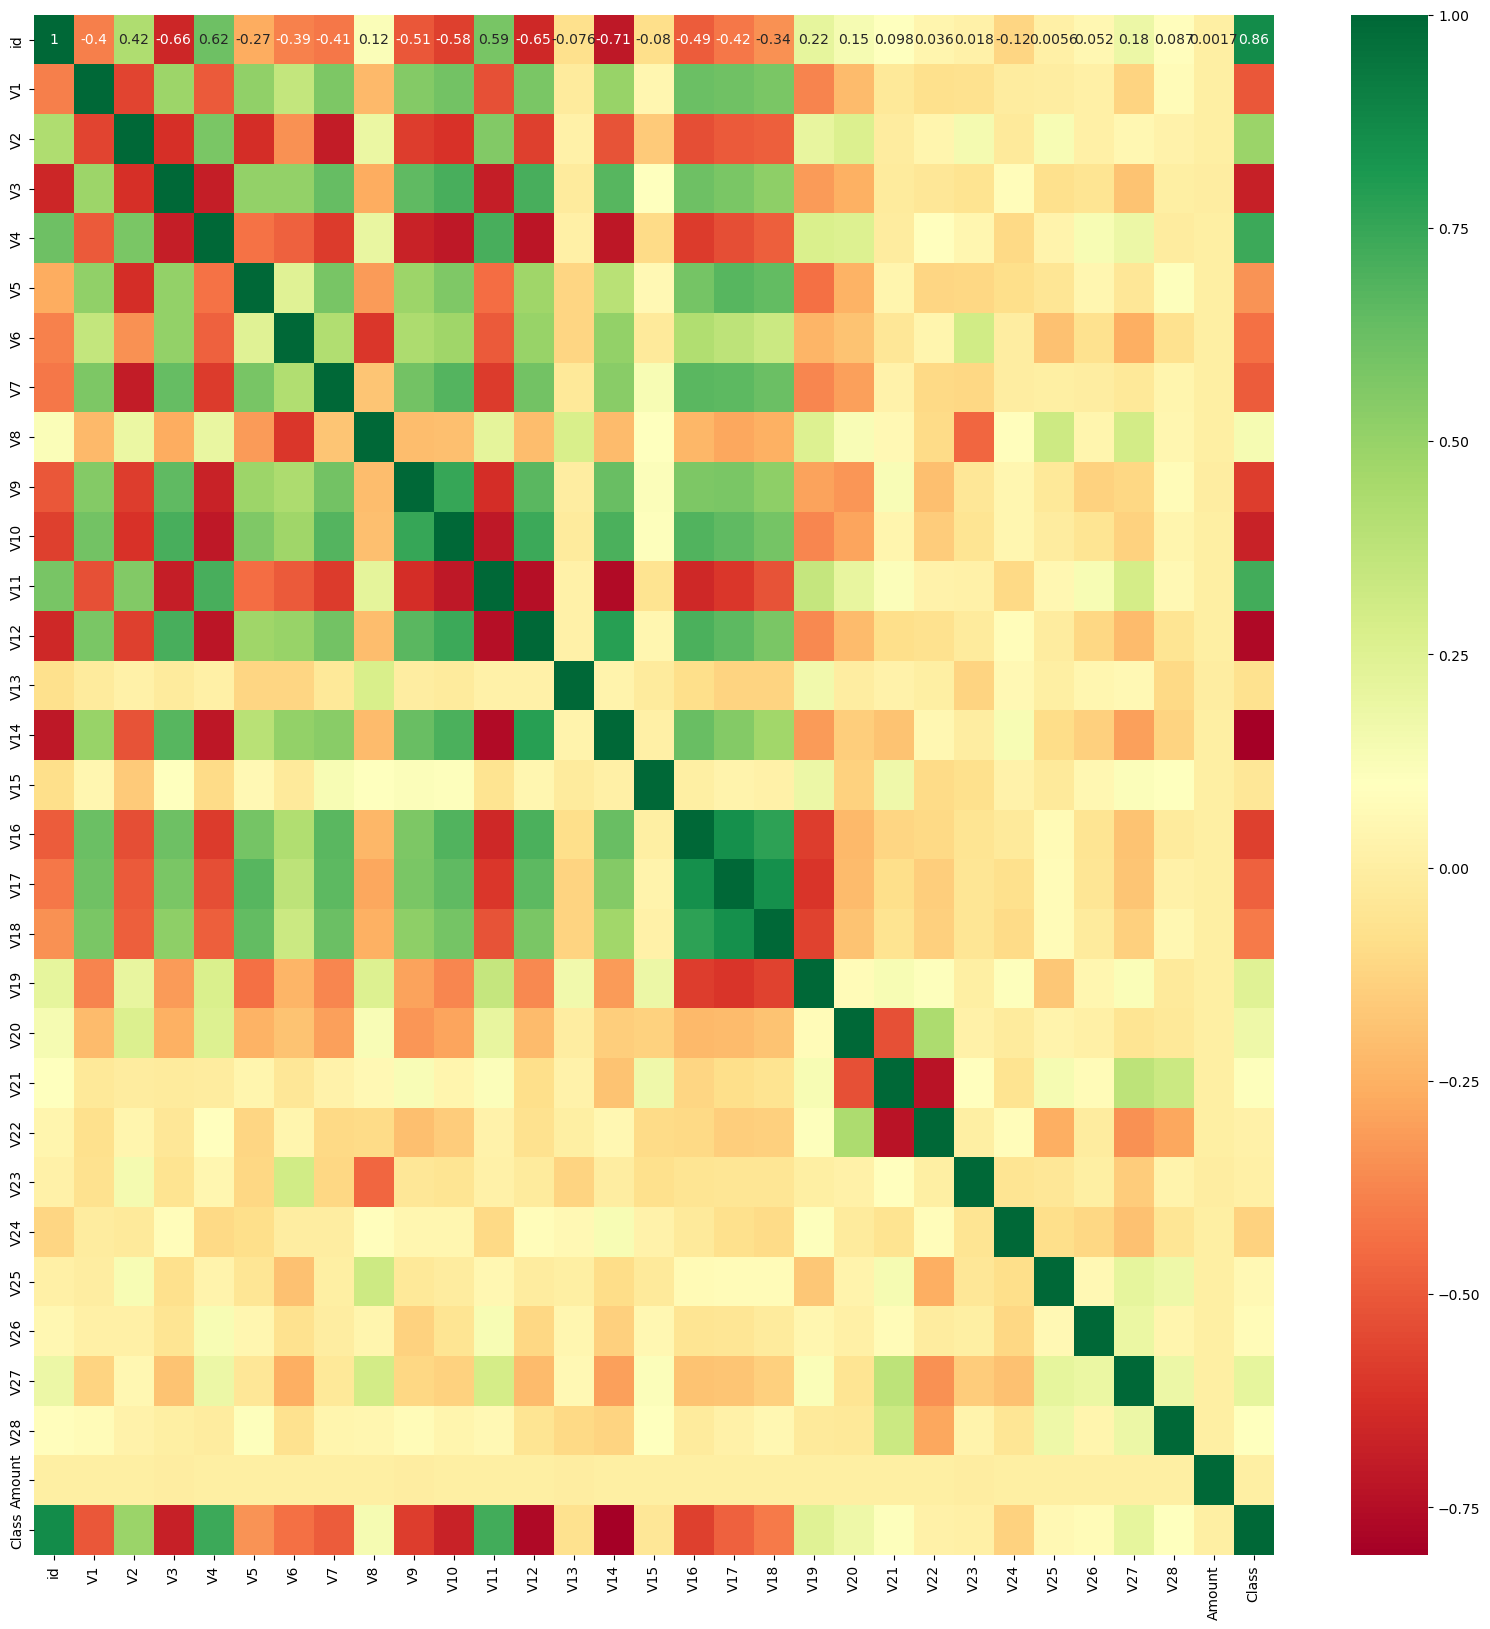

In [11]:
cor=df.corr()
top=cor.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top].corr(),annot=True,cmap="RdYlGn")

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)  
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [29]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=True)

In [30]:
class Autoencoder(nn.Module):
    def __init__(self, input_size, encoding_size):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 32),
            nn.ReLU(),
            nn.Linear(32, encoding_size),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_size, 32),
            nn.ReLU(),
            nn.Linear(32, input_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [31]:
class Classifier(nn.Module):
    def __init__(self, input_size):
        super(Classifier, self).__init__()
        self.fc = nn.Linear(input_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc(x)
        x = self.sigmoid(x)
        return x

In [32]:
class HybridModel(nn.Module):
    def __init__(self, autoencoder, classifier):
        super(HybridModel, self).__init__()
        self.autoencoder = autoencoder
        self.classifier = classifier

    def forward(self, x):
        x = self.autoencoder.encoder(x)
        x = self.classifier(x)
        return x

In [33]:
input_size = X_train.shape[1]
encoding_size = 32 
autoencoder = Autoencoder(input_size, encoding_size)
classifier = Classifier(encoding_size)
hybrid_model = HybridModel(autoencoder, classifier)
hybrid_model 

HybridModel(
  (autoencoder): Autoencoder(
    (encoder): Sequential(
      (0): Linear(in_features=29, out_features=32, bias=True)
      (1): ReLU()
      (2): Linear(in_features=32, out_features=32, bias=True)
      (3): ReLU()
    )
    (decoder): Sequential(
      (0): Linear(in_features=32, out_features=32, bias=True)
      (1): ReLU()
      (2): Linear(in_features=32, out_features=29, bias=True)
      (3): Sigmoid()
    )
  )
  (classifier): Classifier(
    (fc): Linear(in_features=32, out_features=1, bias=True)
    (sigmoid): Sigmoid()
  )
)

In [35]:
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification
optimizer = optim.Adam(hybrid_model.parameters(), lr=0.001)
epochs = 10
for epoch in range(epochs):
    hybrid_model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = hybrid_model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}")

with torch.no_grad():
    hybrid_model.eval()
    train_correct = 0
    total_train_samples = 0
    for inputs, labels in train_loader:
        outputs = hybrid_model(inputs)
        train_predictions = (outputs > 0.5).float()
        train_correct += (train_predictions == labels.unsqueeze(1)).sum().item()
        total_train_samples += labels.size(0)
    train_accuracy = train_correct / total_train_samples

with torch.no_grad():
    hybrid_model.eval()
    test_correct = 0
    total_test_samples = 0
    for inputs, labels in test_loader:
        outputs = hybrid_model(inputs)
        test_predictions = (outputs > 0.5).float()
        test_correct += (test_predictions == labels.unsqueeze(1)).sum().item()
        total_test_samples += labels.size(0)
    test_accuracy = test_correct / total_test_samples

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Epoch 1/10, Loss: 0.003305059205278214
Epoch 2/10, Loss: 0.004616137453177807
Epoch 3/10, Loss: 0.0025598793240597193
Epoch 4/10, Loss: 0.002937002819954635
Epoch 5/10, Loss: 0.0024251085120112164
Epoch 6/10, Loss: 0.002478415019062495
Epoch 7/10, Loss: 0.0037089412090751906
Epoch 8/10, Loss: 0.002300407870106899
Epoch 9/10, Loss: 0.0023723602673842857
Epoch 10/10, Loss: 0.0022911581690403787
Training Accuracy: 0.9998593109755025
Test Accuracy: 0.9997010358229429


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

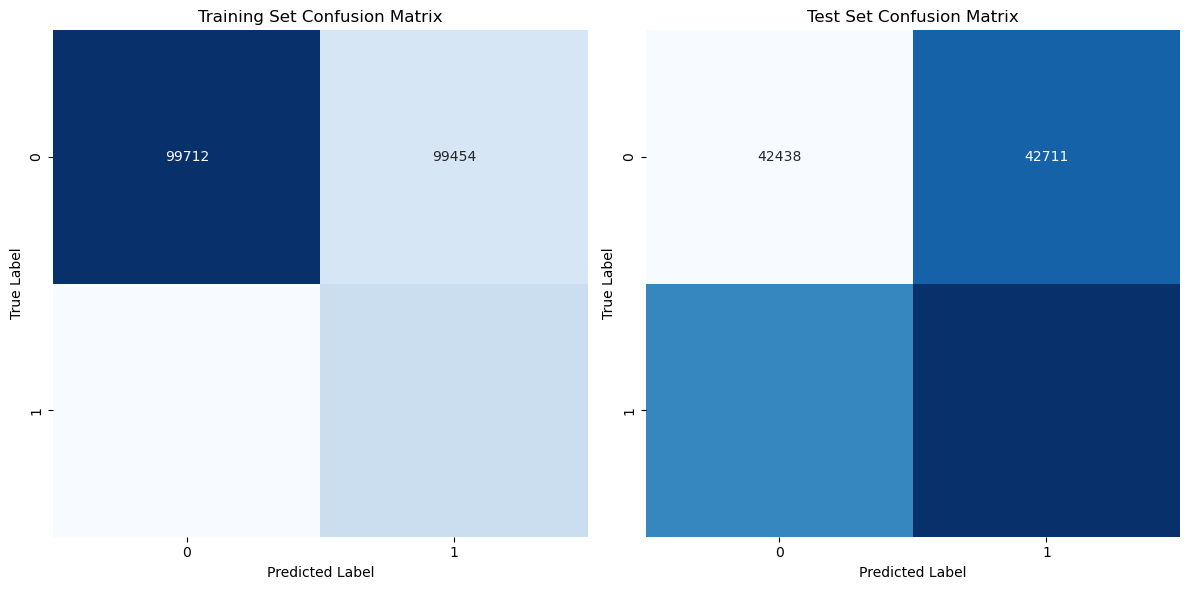

In [40]:
train_predicted_labels = []
with torch.no_grad():
    hybrid_model.eval()
    for inputs, labels in train_loader:
        outputs = hybrid_model(inputs)
        train_predictions = (outputs > 0.5).float()
        train_predicted_labels.extend(train_predictions.squeeze().tolist())

test_predicted_labels = []
with torch.no_grad():
    hybrid_model.eval()
    for inputs, labels in test_loader:
        outputs = hybrid_model(inputs)
        test_predictions = (outputs > 0.5).float()
        test_predicted_labels.extend(test_predictions.squeeze().tolist())

train_predicted_labels = np.array(train_predicted_labels)
test_predicted_labels = np.array(test_predicted_labels)
y_train_numpy = y_train_tensor.numpy()
y_test_numpy = y_test_tensor.numpy()

class_labels = [0, 1]  # Assuming binary classification

train_conf_matrix = confusion_matrix(y_train_numpy, train_predicted_labels, labels=class_labels)
test_conf_matrix = confusion_matrix(y_test_numpy, test_predicted_labels, labels=class_labels)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(train_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.title("Training Set Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.subplot(1, 2, 2)
sns.heatmap(test_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.title("Test Set Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

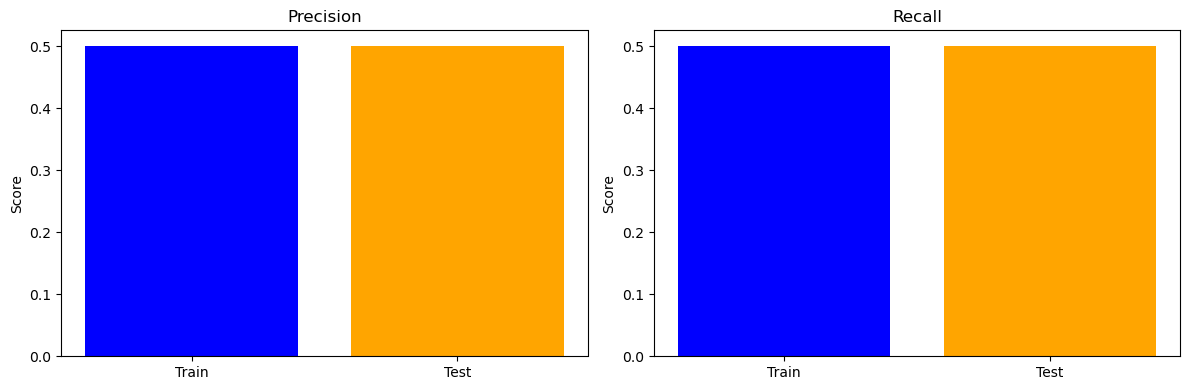

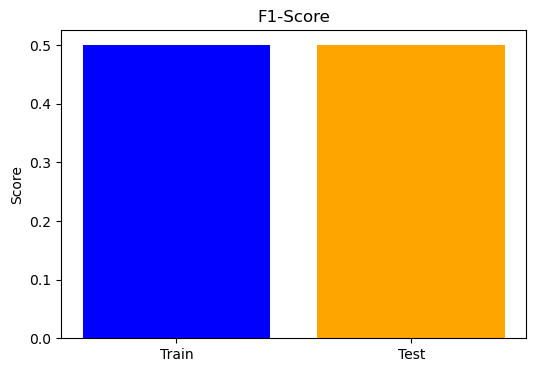

In [45]:
train_precision = precision_score(y_train_numpy, train_predicted_labels)
train_recall = recall_score(y_train_numpy, train_predicted_labels)
train_f1 = f1_score(y_train_numpy, train_predicted_labels)

test_precision = precision_score(y_test_numpy, test_predicted_labels)
test_recall = recall_score(y_test_numpy, test_predicted_labels)
test_f1 = f1_score(y_test_numpy, test_predicted_labels)

# Plot precision, recall, and F1-score
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.bar(['Train', 'Test'], [train_precision, test_precision], color=['blue', 'orange'])
plt.title('Precision')
plt.ylabel('Score')
plt.subplot(1, 2, 2)
plt.bar(['Train', 'Test'], [train_recall, test_recall], color=['blue', 'orange'])
plt.title('Recall')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(['Train', 'Test'], [train_f1, test_f1], color=['blue', 'orange'])
plt.title('F1-Score')
plt.ylabel('Score')
plt.show()

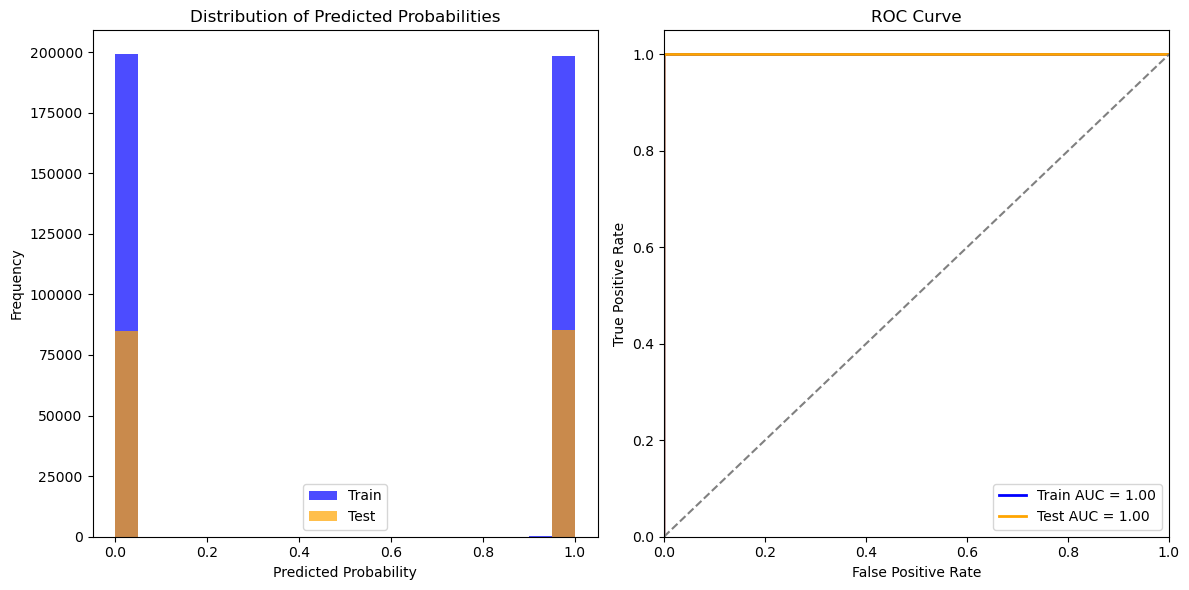

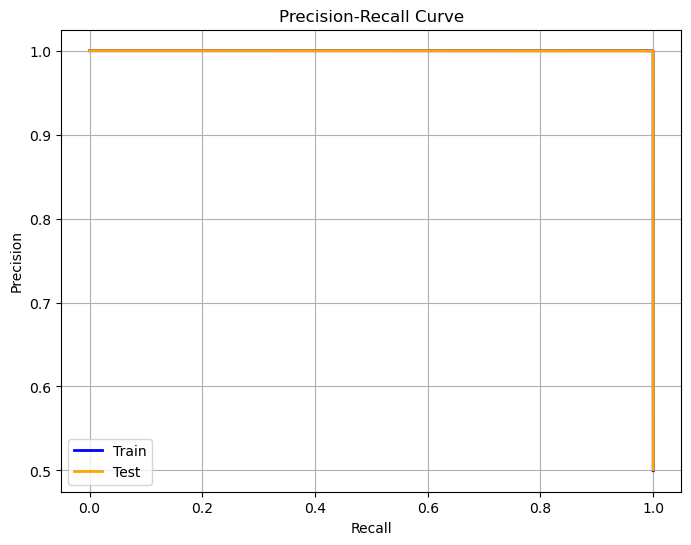

In [47]:
train_probs = hybrid_model(X_train_tensor).detach().numpy().flatten()
test_probs = hybrid_model(X_test_tensor).detach().numpy().flatten()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(train_probs, bins=20, color='blue', alpha=0.7, label='Train')
plt.hist(test_probs, bins=20, color='orange', alpha=0.7, label='Test')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
train_roc_auc = roc_auc_score(y_train_numpy, train_probs)
fpr_train, tpr_train, _ = roc_curve(y_train_numpy, train_probs)
test_roc_auc = roc_auc_score(y_test_numpy, test_probs)
fpr_test, tpr_test, _ = roc_curve(y_test_numpy, test_probs)
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train AUC = {train_roc_auc:.2f}')
plt.plot(fpr_test, tpr_test, color='orange', lw=2, label=f'Test AUC = {test_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
precision_train, recall_train, _ = precision_recall_curve(y_train_numpy, train_probs)
precision_test, recall_test, _ = precision_recall_curve(y_test_numpy, test_probs)
plt.plot(recall_train, precision_train, color='blue', lw=2, label='Train')
plt.plot(recall_test, precision_test, color='orange', lw=2, label='Test')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()